# Importing all the required packages and loading the datasets

In [4]:
import pandas as pd
import matplotlib.pyplot as p
data = pd.read_csv('bitcoin_dataset.csv')
test = pd.read_csv('test_set(1).csv')

In [5]:
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [6]:
# printing the top 5 rows of data
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010 0:00,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010 0:00,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010 0:00,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010 0:00,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010 0:00,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [7]:
#Checking the dimensions of data
data.shape

(2906, 24)

# Handling missing data

In [9]:
## checking whether missing values are present
pd.isnull(data)

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
#Calculating the total number of missing values in the data
sum(data.apply(lambda x: sum(x.isnull().values), axis = 1)>0)

115

In [11]:
# Checking which columns has missing values
data.apply(lambda x: sum(x.isnull().values), axis = 0)

Date                                                    0
btc_market_price                                        0
btc_total_bitcoins                                     27
btc_market_cap                                          0
btc_trade_volume                                       21
btc_blocks_size                                        29
btc_avg_block_size                                      0
btc_n_orphaned_blocks                                   0
btc_n_transactions_per_block                            0
btc_median_confirmation_time                           12
btc_hash_rate                                           0
btc_difficulty                                         16
btc_miners_revenue                                      0
btc_transaction_fees                                   10
btc_cost_per_transaction_percent                        0
btc_cost_per_transaction                                0
btc_n_unique_addresses                                  0
btc_n_transact

In [12]:
# Making a copy of main data into data1 to handle missing data and do further computations
data1 = data
data1.head()
data1.shape

(2906, 24)

In [13]:
# Describing the data
data1.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344255e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866150e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.265250e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


In [14]:
#there are 115 missing values

# filling missing values using mean of the column.
data1['btc_total_bitcoins'].fillna(data1['btc_total_bitcoins'].mean(), inplace=True) 

In [16]:
data1['btc_trade_volume'].fillna(data1['btc_trade_volume'].median(), inplace=True) # by median
data1['btc_blocks_size'].fillna(data1['btc_blocks_size'].median(), inplace=True) # by median
data1['btc_median_confirmation_time'].fillna(data1['btc_median_confirmation_time'].mean(), inplace=True) #by mean
data1['btc_difficulty'].fillna(data1['btc_difficulty'].median(), inplace=True) #by median
data1['btc_transaction_fees'].fillna(data1['btc_transaction_fees'].median(), inplace=True) #by median


In [17]:
# Checking the columns once more to confirm there are no missing values
data1.apply(lambda x: sum(x.isnull().values), axis = 0)

Date                                                   0
btc_market_price                                       0
btc_total_bitcoins                                     0
btc_market_cap                                         0
btc_trade_volume                                       0
btc_blocks_size                                        0
btc_avg_block_size                                     0
btc_n_orphaned_blocks                                  0
btc_n_transactions_per_block                           0
btc_median_confirmation_time                           0
btc_hash_rate                                          0
btc_difficulty                                         0
btc_miners_revenue                                     0
btc_transaction_fees                                   0
btc_cost_per_transaction_percent                       0
btc_cost_per_transaction                               0
btc_n_unique_addresses                                 0
btc_n_transactions             

In [18]:
# Checking the correlation between the variables by correlation matrix
corrdata = pd.DataFrame(data1.corr())
corrdata

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
btc_market_price,1.000000,0.392234,0.999784,0.868829,0.675024,0.544033,-0.076400,0.544125,0.274080,0.920876,...,-0.013517,0.815507,0.663917,0.569603,0.680048,0.558416,0.567281,0.111734,0.050894,0.968308
btc_total_bitcoins,0.392234,1.000000,0.384389,0.285240,0.772718,0.847962,0.274684,0.828094,0.658824,0.488253,...,-0.079864,0.372531,0.817668,0.829480,0.780207,0.811923,0.797756,0.290604,0.211535,0.387700
btc_market_cap,0.999784,0.384389,1.000000,0.869285,0.673402,0.541357,-0.080745,0.541746,0.270799,0.922108,...,-0.012925,0.805635,0.660761,0.566896,0.678136,0.555714,0.564836,0.112418,0.051361,0.968534
btc_trade_volume,0.868829,0.285240,0.869285,1.000000,0.521611,0.416077,-0.069286,0.430410,0.216448,0.758371,...,-0.009399,0.689926,0.539404,0.453765,0.525571,0.442109,0.449849,0.097422,0.056095,0.896041
btc_blocks_size,0.675024,0.772718,0.673402,0.521611,1.000000,0.955173,0.052780,0.946017,0.501732,0.826458,...,-0.030058,0.444760,0.965919,0.949476,0.999189,0.951348,0.960630,0.251851,0.153573,0.672881
btc_avg_block_size,0.544033,0.847962,0.541357,0.416077,0.955173,1.000000,0.147514,0.977887,0.553085,0.687581,...,-0.036717,0.335611,0.967663,0.977940,0.954478,0.976108,0.969182,0.296547,0.191663,0.553090
btc_n_orphaned_blocks,-0.076400,0.274684,-0.080745,-0.069286,0.052780,0.147514,1.000000,0.114178,0.071608,-0.092103,...,-0.015803,0.009497,0.122447,0.108167,0.054493,0.115909,0.073792,-0.006275,0.018300,-0.080944
btc_n_transactions_per_block,0.544125,0.828094,0.541746,0.430410,0.946017,0.977887,0.114178,1.000000,0.557748,0.670598,...,-0.036007,0.318210,0.966663,0.980739,0.945276,0.976423,0.975156,0.298024,0.188603,0.563285
btc_median_confirmation_time,0.274080,0.658824,0.270799,0.216448,0.501732,0.553085,0.071608,0.557748,1.000000,0.341905,...,-0.055221,0.178618,0.511698,0.543757,0.507754,0.508925,0.532408,0.308576,0.217102,0.280985
btc_hash_rate,0.920876,0.488253,0.922108,0.758371,0.826458,0.687581,-0.092103,0.670598,0.341905,1.000000,...,-0.015868,0.695143,0.769263,0.699357,0.829537,0.692128,0.712023,0.161671,0.081981,0.887864


In [19]:
# Writing out the correlation matrix results to study which variables are highly correlated with each other
corrdata.to_csv('output.csv')

# Plotting the variables wrt to Date 

In [20]:
#Changing Date from String formaat to Data format
thelist=[(datetime.strptime(data1['Date'][i][0:-5], '%m/%d/%Y')) for i in data.index]
df = pd.Series( (v for v in thelist) )
data["Date"]=df

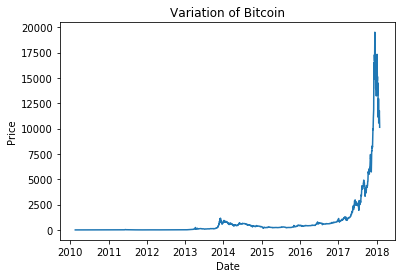

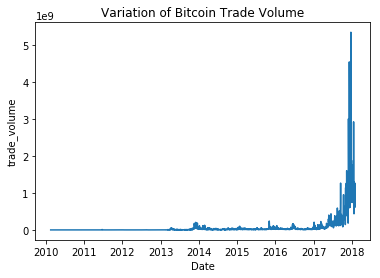

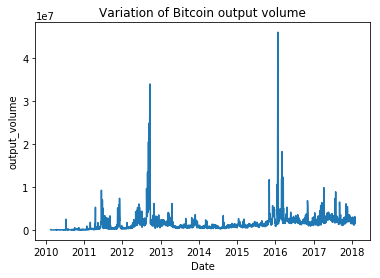

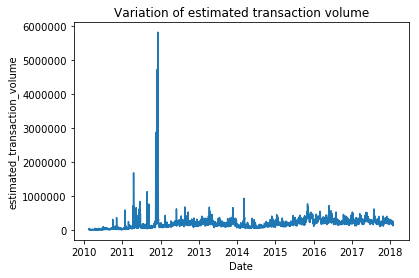

In [21]:
plt.plot(data['Date'],data['btc_market_price'])
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Variation of Bitcoin")
plt.show()

plt.plot(data['Date'],data['btc_trade_volume'])
plt.xlabel("Date")
plt.ylabel("trade_volume")
plt.title("Variation of Bitcoin Trade Volume")
plt.show()

plt.plot(data['Date'],data['btc_output_volume'])
plt.xlabel("Date")
plt.ylabel("output_volume")
plt.title("Variation of Bitcoin output volume")
plt.show()

plt.plot(data['Date'],data['btc_estimated_transaction_volume'])
plt.xlabel("Date")
plt.ylabel("estimated_transaction_volume")
plt.title("Variation of estimated transaction volume")
plt.show()



In [3]:
import os 
os.getcwd()

'C:\\Users\\jaahn\\Documents\\SEM 4 SUBJS\\applied machine learning\\proj 1'

# Dataset with Selected Columns for building models

In [22]:
#selected columns(independent variables) from the dataset
selcol=['btc_total_bitcoins', 'btc_trade_volume','btc_n_orphaned_blocks','btc_median_confirmation_time',
       'btc_difficulty','btc_cost_per_transaction','btc_output_volume', 'btc_estimated_transaction_volume']

In [23]:
#subsetting data based on the selected columns
seldata = data1[selcol]
Tdata=test[selcol]
y_data = data1['btc_market_price']


In [24]:
#splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(seldata, y_data, random_state=0)
X_train.shape
X_test.shape

(727, 8)

In [25]:
#scaling the training data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scaling the Testing Data to fit for prediction
t_scaled=scaler.transform(Tdata)


# Training the Data with the following models:

# KNN Regressor

In [26]:
knnreg=KNeighborsRegressor()
# Considering a range of k values
k_value={'n_neighbors':range(1,50)}

# finding the best k value using Grid Search
gridk=GridSearchCV(knnreg,param_grid=k_value, cv=10)

# Running the KNN regressor with best parameter on the training data
knnmodel = gridk.fit(X_train_scaled,y_train)

print('R-Square of K-NN regressor on training data: {:.4f}'.format(gridk.score(X_train_scaled, y_train)))
print('R-Square of K-NN regressor on test data: {:.4f}'.format(gridk.score(X_test_scaled, y_test)))

# Printing the Best parameter and Best estimator
print("Best Parameter:")
print(gridk.best_params_)
print("Best Estimator:")
print(gridk.best_estimator_)
print("Best Score:")
print(gridk.best_score_)


R-Square of K-NN regressor on training data: 0.9930
R-Square of K-NN regressor on test data: 0.9869
Best Parameter:
{'n_neighbors': 3}
Best Estimator:
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')
Best Score:
0.98425118224


In [27]:
print("Average Cross Validation Score of KNN on Training Data:", 
      '%.4f' %cross_val_score(KNeighborsRegressor(n_neighbors=3), X_train_scaled, y_train, cv = 10).mean())


Average Cross Validation Score of KNN on Training Data: 0.9843


# Linear Regression

In [28]:
# Running the Linear Regressor and Fitting the model on scaled data
scaledLR=LinearRegression().fit(X_train_scaled,y_train)
print("The R-Square of Linear Regression on training data is : ",'%.4f' %scaledLR.score(X_train_scaled,y_train))
print("The R-Square of Linear Regression on test data is: ",'%.4f' %scaledLR.score(X_test_scaled,y_test))

The R-Square of Linear Regression on training data is :  0.9443
The R-Square of Linear Regression on test data is:  0.9430


In [29]:
print("Average Cross Validation Score of Linear Regression on Training Data:", 
      '%.4f' %cross_val_score(LinearRegression(), X_train_scaled, y_train, cv = 10).mean())


Average Cross Validation Score of Linear Regression on Training Data: 0.9416


# Lasso Regression


In [30]:
scaledlassoLR=Lasso()
param={'alpha':[0.1,1,10,50,100], 'max_iter':[100,1000,10000,100000]}

# Finding the best parameters for Lasso using Grid Search
gridlasso=GridSearchCV(scaledlassoLR,param_grid=param, cv=10)

# Training the model 
lassomodel = gridlasso.fit(X_train_scaled,y_train)

       
#Printing the Accuracy of Training and testing data
print("The R-Square of Lasso on Training data is : ",'%.4f' %gridlasso.score(X_train_scaled,y_train))
print("The R-Square of Lasso on Test data is : ",'%.4f' %gridlasso.score(X_test_scaled,y_test))

# Printing the Best parameters and Best estimator
print("Best Parameters:")
print(gridlasso.best_params_)
print("Best Estimator:")
print(gridlasso.best_estimator_)

The R-Square of Lasso on Training data is :  0.9443
The R-Square of Lasso on Test data is :  0.9429
Best Parameters:
{'alpha': 0.1, 'max_iter': 100}
Best Estimator:
Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)


In [31]:
print("Average Cross Validation Score of Lasso Regression on Training Data :", 
      '%.4f' %cross_val_score(Lasso(alpha=0.1, max_iter=100), X_train_scaled, y_train, cv = 10).mean())

Average Cross Validation Score of Lasso Regression on Training Data : 0.9416


# Ridge Regression

In [32]:
scaledridge=Ridge()
alpha={'alpha':[0.1,1,5,10,15,20,25], 'max_iter':[100,1000,10000,100000]}
# Finding the best parameters for Ridge using Grid Search
gridridge=GridSearchCV(scaledridge,param_grid=alpha, cv=10)

# Fitting the model
ridgemodel = gridridge.fit(X_train_scaled,y_train)


print("The R-Square of Ridge on Training data is : ",'%.4f' %gridridge.score(X_train_scaled,y_train))
print("The R-Square of Ridge on Test data is: ",'%.4f' %gridridge.score(X_test_scaled,y_test))
# Printing the Best parameters and Best estimator
print("Best Parameters:")
print(gridridge.best_params_)
print("Best Estimator:")
print(gridridge.best_estimator_)

The R-Square of Ridge on Training data is :  0.9442
The R-Square of Ridge on Test data is:  0.9426
Best Parameters:
{'alpha': 0.1, 'max_iter': 100}
Best Estimator:
Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [33]:
print("Average Cross Validation Score of Ridge Regression on Training Data :", 
      '%.4f' %cross_val_score(Ridge(alpha=0.1,max_iter=100), X_train_scaled, y_train, cv = 10).mean())

Average Cross Validation Score of Ridge Regression on Training Data : 0.9416


# Polynomial Regression

In [34]:
# Created polynomial features on the selected data

poly=PolynomialFeatures(degree=2)

seldata_poly = poly.fit_transform(seldata)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(seldata_poly, y_data,
                                                   random_state = 0)

#scaling the polynomial training data
scaler = MinMaxScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)

X_test_poly_scaled = scaler.transform(X_test_poly)

t_poly_scaled=poly.transform(t_scaled)


# Training the polynomial Regression using Linear Regression
polyLR=LinearRegression().fit(X_train_poly_scaled,y_train)
print("The training score is : ",'%.4f' %polyLR.score(X_train_poly_scaled,y_train))
print("The test score is : ",'%.4f' %polyLR.score(X_test_poly_scaled,y_test))

The training score is :  0.9870
The test score is :  0.9773


In [35]:
print("Average Cross Validation Score of Polynomial Regression on training Data :", 
      '%.4f' %cross_val_score(LinearRegression(), X_train_poly_scaled, y_train, cv = 10).mean())

Average Cross Validation Score of Polynomial Regression on training Data : 0.9826


# SVM

# SVM without Kernel

In [37]:
from sklearn.svm import SVR
# Defining the Support Vector Regressor Without any Kernel and training the model
SVR=SVR().fit(X_train_scaled,y_train)
print("The best training score is : ",'%.4f' %SVreg.score(X_train_scaled,y_train))
print("The best test score is : ",'%.4f' %SVreg.score(X_test_scaled,y_test))
print("Mean Cross Validation Score of SVR on Scaled Data :", 
      '%.4f' %cross_val_score(SVR(), X_train_scaled, y_train, cv = 10).mean())

NameError: name 'SVreg' is not defined

# SVM with Kernel

In [38]:
param={'epsilon':[0.1,0.5,1,2,5,10,15,20,25,100], 'C':[1,5,10,20,50,100,1000,10000]}
# Defining the Support vector Regressor with Linear Kernel
clf=SVR(kernel='linear')
gridsvr=GridSearchCV(clf,param_grid=param,cv=10)
# Training the model
svrLM = gridsvr.fit(X_train_scaled,y_train)
print("The training score is : ",'%.4f' %gridsvr.score(X_train_scaled,y_train))
print("The test score is : ",'%.4f' %gridsvr.score(X_test_scaled,y_test))
# Printing the Best parmeters and Best estimator
print("Best Parameters:")
print(gridsvr.best_params_)
print("Best Estimator:")
print(gridsvr.best_estimator_)

TypeError: 'SVR' object is not callable

In [39]:
param={'epsilon':[0.1,0.5,1,2,5,10,15,20,25,100], 'C':[1,5,10,20,50,100,1000,10000]}
# Defining the Support vector Regressor with RBF Kernel
clf=SVR(kernel='rbf')
gridsvr2=GridSearchCV(clf,param_grid=param,cv=10)
# Training the model
svrRM = gridsvr2.fit(X_train_scaled,y_train)
print("The training score is : ",'%.4f' %gridsvr2.score(X_train_scaled,y_train))
print("The test score is : ",'%.4f' %gridsvr2.score(X_test_scaled,y_test))
# Printing the Best parmeters and Best estimator
print("Best Parameters:")
print(gridsvr.best_params_)
print("Best Estimator:")
print(gridsvr.best_estimator_)

TypeError: 'SVR' object is not callable

In [40]:
param={'epsilon':[0.1,0.5,1,2,5,10,15,20,25,100], 'C':[1,5,10,20,50,100,1000,10000]}
# Defining the Support vector Regressor with Poly Kernel
clf=SVR(kernel='poly')
gridsvr3=GridSearchCV(clf,param_grid=param,cv=10)
# Training the model
svrPM = gridsvr3.fit(X_train_scaled,y_train)
print("The training score is : ",'%.4f' %gridsvr3.score(X_train_scaled,y_train))
print("The test score is : ",'%.4f' %gridsvr3.score(X_test_scaled,y_test))
# Printing the Best parmeters and Best estimator
print("Best Parameters:")
print(gridsvr.best_params_)
print("Best Estimator:")
print(gridsvr.best_estimator_)

TypeError: 'SVR' object is not callable

# Printing the Cross Validation Scores for all the models

In [56]:
print("Mean Cross Validation Score of KNN model:", 
      '%.4f' %cross_val_score(KNeighborsRegressor(n_neighbors=3), X_train_scaled, y_train, cv = 10).mean())
print("Mean Cross Validation Score of Linear Regression model:", 
      '%.4f' %cross_val_score(LinearRegression(), X_train_scaled, y_train, cv = 10).mean())
print("Mean Cross Validation Score of Ridge Regression model :", 
      '%.4f' %cross_val_score(Ridge(alpha=0.1,max_iter=100L), X_train_scaled, y_train, cv = 10).mean())
print("Mean Cross Validation Score of Lasso Regression model :", 
      '%.4f' %cross_val_score(Lasso(alpha=0.1, max_iter=100), X_train_scaled, y_train, cv = 10).mean())
print("Mean Cross Validation Score of Polynomial Regression model :", 
      '%.4f' %cross_val_score(LinearRegression(), X_train_poly_scaled, y_train, cv = 10).mean())
print("Mean Cross Validation Score of SVR model :", 
      '%.4f' %cross_val_score(SVR(), X_train_scaled, y_train, cv = 10).mean())
print("Mean Cross Validation Score of Linear SVR model :", 
      '%.4f' %cross_val_score(SVR(kernel='linear', epsilon=0.1, C=10000), X_train_scaled, y_train, cv = 10).mean())
print("Mean Cross Validation Score of RBF SVR model :", 
      '%.4f' %cross_val_score(SVR(kernel='rbf', epsilon=5, C=1000), X_train_scaled, y_train, cv = 10).mean())
print("Mean Cross Validation Score of Polynomial SVR model :", 
      '%.4f' %cross_val_score(SVR(kernel='poly', epsilon=0.1, C=10000), X_train_scaled, y_train, cv = 10).mean())


Mean Cross Validation Score of KNN on Scaled Data : 0.9843
Mean Cross Validation Score of Linear Regression on Scaled Data : 0.9416
Mean Cross Validation Score of Ridge Regression on Scaled Data : 0.9416
Mean Cross Validation Score of Lasso Regression on Scaled Data : 0.9416
Mean Cross Validation Score of Polynomial Regression on Scaled Data : 0.9826
Mean Cross Validation Score of SVR on Scaled Data : -0.0587
Mean Cross Validation Score of Linear SVR on Scaled Data : 0.9220
Mean Cross Validation Score of RBF SVR on Scaled Data : 0.8532
Mean Cross Validation Score of Polynomial SVR on Scaled Data : 0.8762


# Testing Models

In [41]:
# Running the models on the test data

polyLR.predict(t_poly_scaled)

array([  8972.76591609,   9907.7677671 ,   9946.61410486,  10813.77803054,
         9248.42085639,   7368.84117702,   8006.18847204,   8931.53325411,
         9160.93196947,   9091.96641032,  10113.91397971,   9850.24586663,
         8931.07789517,  10370.95067232])

In [42]:
lassomodel.predict(t_scaled)

array([ 14012.82684062,  15883.00519733,  13384.87376897,  14082.67704026,
        14626.80142461,  17299.26898687,  15073.52371436,  14669.97053469,
        14226.51180946,  13857.45273815,  14309.96225958,  14134.77928784,
        12668.72653095,  14547.55368557])

In [43]:
ridgemodel.predict(t_scaled)

array([ 13989.81717746,  15825.15585526,  13396.0505546 ,  14091.41864857,
        14584.59532631,  17185.79188507,  15039.9568168 ,  14660.87245473,
        14230.64868649,  13869.32912699,  14335.49376951,  14157.36956321,
        12725.64494914,  14568.43773566])

In [44]:
scaledLR.predict(t_scaled)

array([ 14019.78218707,  15894.94934472,  13385.93925291,  14084.92982182,
        14633.15891522,  17315.83709755,  15078.57188151,  14674.69097902,
        14228.85089513,  13857.21476723,  14308.57308095,  14135.20547156,
        12664.10675909,  14548.53028383])

In [45]:
svrLM.predict(t_scaled)

NameError: name 'svrLM' is not defined

In [46]:
knnmodel.predict(t_scaled)

array([ 10426.29666667,  10756.94111333,  10788.84389   ,  11420.10055667,
        10792.31355667,  12442.42667   ,  10426.29666667,  10426.29666667,
        10507.24333333,  10507.24333333,  11420.10055667,  10788.84389   ,
        11316.06      ,  10973.19555667])

Of all the models trained and testing on BitCoin dataset, the best model we found is the KNN Regressor model with best R-squared value